$$\textbf{Potential Flow with Sources and Sinks}$$

This notebook will determine the velocity of a fluid containing user placed sources and sinks.
A plot of the streamlines due to the presence of each source and sink will be made. Sinks are represented by a blue dot and sources by a red dot. The placement of massless particles into the fluid is possible and a simulation using ivisual can be run to show the particles moving along with the fluid, these particles are depicted as green.

$$\\ \nabla^2 \Phi = 0. \\$$

The general solution in 3D for a point source of strength Q is

$$\\ \Phi_{i} = \frac{-Q_{i}}{4 \pi} \frac{1}{|\textbf{r}-\textbf{r}_i|} \\$$

Because the laplacian is linear the solution for many sources and sinks will just be the superposition of many versions of this general solution.

$$\\ \Phi = \sum_{Sources} \frac{-Q_{i}}{4 \pi} \frac{1}{|\textbf{r}-\textbf{r}_i|}  \\$$

We shall confine all placed objects to the x-y plane to simplify visualisation. The size of the system is a 15x15 grid.



Source loaded:(x,y,z)=(0.0,0.0,0.0) Strength:1.0
Source loaded:(x,y,z)=(0.2,0.0,0.0) Strength:-1.0


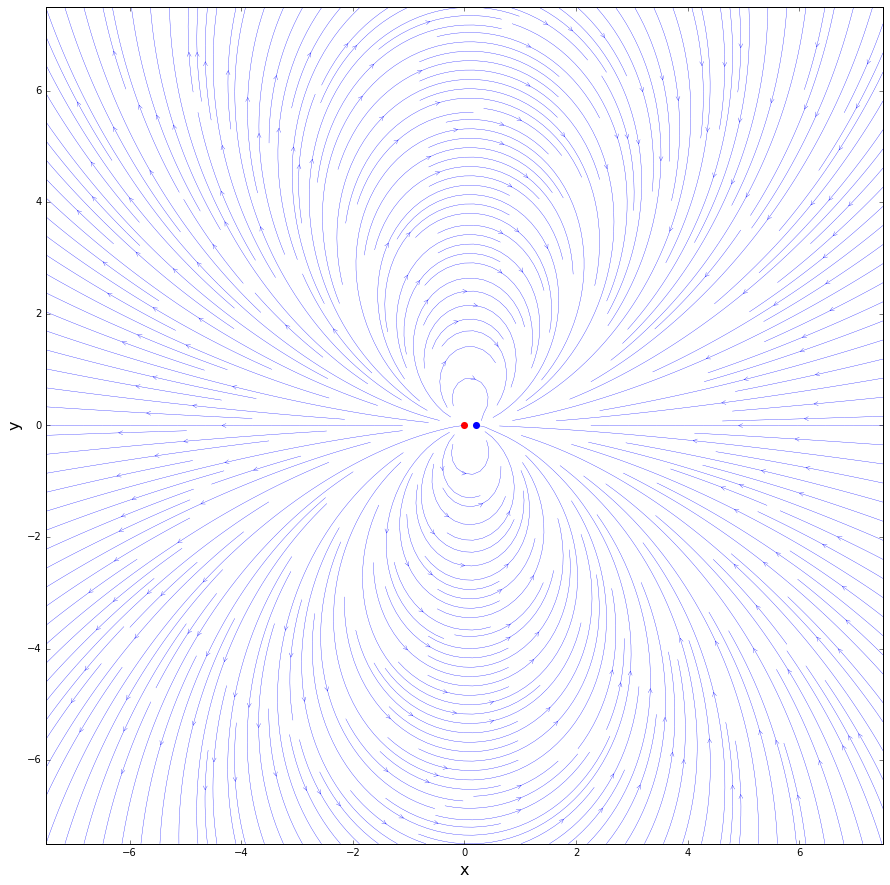

In [6]:
from ivisual import *
from __future__ import division, print_function
import numpy as np
from math import sqrt,pi
from ipywidgets import widgets
from IPython.display import display
from IPython.html import widgets
from matplotlib import pyplot

sources=[]
particles=[]
sysSize = 15.0
N = 100
xstart,xend = -sysSize/2.0,sysSize/2.0
ystart,yend=xstart,xend
zstart,zend=xstart,xend

def fl(string):
    try:
        return float(string)
    except ValueError:
        return 0.0

class source:
    def __init__(self,position,magnitude):
        self.pos=position
        self.strength=1.0*float(magnitude)
class particle:
    def __init__(self,position):
        self.pos=position

class main:
    def __init__(self):
        self.objSel=widgets.ToggleButtons(description='Object Type:',options=['Source','Particle'])
        self.objPos = [widgets.Text(description='X',width=100),widgets.Text(description='Y',width=100 ),widgets.Text(description='Z',width=100,disabled=True,value=str(0))]
        self.POS = widgets.HBox(children=self.objPos)
        self.objStrength=widgets.Text(description='Strength',width=100)
        self.addObj=widgets.Button(description="Add object",width=100)
        self.startSim = widgets.Button(description="Start",width=100)
        self.runSim = widgets.Button(description="Run Particle Simulation",width=200)
        self.addObj.on_click(self.add)
        self.startSim.on_click(self.start)
        self.runSim.on_click(self.run)
    def add(self,b):
        if self.objSel.value=="Particle":
            particles.append(particle([fl(self.objPos[0].value),fl(self.objPos[1].value),fl(self.objPos[2].value)]))
            print("Particle loaded:" + "(x,y,z)=(" +str(fl(self.objPos[0].value))+','+str(fl(self.objPos[1].value))+','+str(fl(self.objPos[2].value))+')')
        else:
            sources.append(source([fl(self.objPos[0].value),fl(self.objPos[1].value),fl(self.objPos[2].value)],fl(self.objStrength.value)))
            print("Source loaded:" + "(x,y,z)=(" +str(fl(self.objPos[0].value))+','+str(fl(self.objPos[1].value))+','+str(fl(self.objPos[2].value))+ ') Strength:'+ str(fl(self.objStrength.value)))
    
    def display(self):
        display(self.objSel,self.POS,self.objStrength,self.addObj,self.startSim)
    def run(self,b):
        scene = canvas()
        print(""" Here is a demonstration of the flow of particles through the fluid
        Right button drag to rotate "camera" to view scene.
          On a one-button mouse, right is Command + mouse.
        Middle button to drag up or down to zoom in or out.
          On a two-button mouse, middle is left + right.
          On a one-button mouse, middle is Option + mouse.
        """)

        PART=[]
        SRC=[]
        for i in range(0,len(particles)):
            PART.append(sphere (color = color.green, radius = 0.2,pos=particles[i].pos, make_trail=True, interval=10, retain=1000))
            #PART[i].pos=particles[i].pos
            PART[i].mass=1.0
            PART[i].p=self.setV(PART[i].pos)
        for i in range(0,len(sources)):
            SRC.append(sphere ( radius = 0.2, make_trail=False))
            SRC[i].pos=sources[i].pos
            if(sources[i].strength<0):
                SRC[i].color=color.blue
            else:
                SRC[i].color=color.red

        display(scene)

        dt = 0.05
        t=0.0
        while t < 2000.0:
            rate(100*int(1.0/dt))
            for i in range(0,len(PART)):
                PART[i].pos[0]+=PART[i].p[0]*dt
                PART[i].pos[1]+=PART[i].p[1]*dt
                #PART[i].pos[2]+=PART[i].p[2]*dt
                PART[i].p=self.setV(PART[i].pos)
            t = t + dt
    def start(self,b):
        if(len(sources)>0):
            x=np.linspace(xstart,xend,N)
            y=np.linspace(ystart,yend,N)
            z=np.linspace(zstart,zend,N)
            X,Y=np.meshgrid(x,y)
            Z=0 #add in 3D ability
            xsources=[]
            xsinks=[]
            ysources=[]
            ysinks=[]
            zsources=[]
            zsinks=[]
            self.vx= sources[0].strength/(4.0*pi) * (X-sources[0].pos[0])/(((X-sources[0].pos[0])**2 + (Y-sources[0].pos[1])**2+(Z-sources[0].pos[2])**2))**1.5
            self.vy= sources[0].strength/(4.0*pi) * (Y-sources[0].pos[1])/(((X-sources[0].pos[0])**2 + (Y-sources[0].pos[1])**2+(Z-sources[0].pos[2])**2))**1.5
            for i in range(0,len(sources)):
                if(i>0):
                    self.vx+=sources[i].strength/(4.0*pi) * (X-sources[i].pos[0])/(((X-sources[i].pos[0])**2 + (Y-sources[i].pos[1])**2+(Z-sources[0].pos[2])**2))**1.5
                    self.vy+= sources[i].strength/(4.0*pi) * (Y-sources[i].pos[1])/(((X-sources[i].pos[0])**2 + (Y-sources[i].pos[1])**2+(Z-sources[0].pos[2])**2))**1.5
                if(sources[i].strength<0):
                    xsinks.append(sources[i].pos[0])
                    ysinks.append(sources[i].pos[1])
                    zsinks.append(sources[i].pos[2])
                else:
                    xsources.append(sources[i].pos[0])
                    ysources.append(sources[i].pos[1])
                    zsources.append(sources[i].pos[2])
            %matplotlib inline
            pyplot.figure(figsize=(sysSize, (yend-ystart)/(xend-xstart)*sysSize))
            pyplot.xlabel('x', fontsize=16)
            pyplot.ylabel('y', fontsize=16)
            pyplot.xlim(xstart, xend)
            pyplot.ylim(ystart, yend)
            pyplot.scatter(xsinks, ysinks, s=50, color='b', marker='o', linewidth=0)
            pyplot.scatter(xsources, ysources, s=50, color='r', marker='o', linewidth=0)
            pyplot.streamplot(X, Y, self.vx, self.vy, density=3, linewidth=0.3, arrowsize=1, arrowstyle='->')
            if(len(particles)>0):
                display(self.runSim)
        else:
            pass
    def setV(self,x):
        if(abs(x[0] or x[1] or x[2]) >sysSize/2.0):
            return [0,0,0]
        else:
            i=int(round((N-1.0)*(x[0]-xstart)/(xend-xstart),0))
            j=int(round((N-1.0)*(x[0]-ystart)/(yend-ystart),0))
            return [self.vx[i,j],self.vy[i,j]]
MAIN=main()
MAIN.display()

